<a href="https://colab.research.google.com/github/kaushaldeep7/python_fundamentals2/blob/main/Decision_Tree_fraud_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:

Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Target variable is Taxable_income

### Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
#import the fraud_check dataset
fraud=pd.read_csv('/content/Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Exploratory data analysis

In [ ]:
#checking the null values in the dataset
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
#info
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
#describe
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
#checking the duplicates values
fraud.duplicated().sum()

0

In [ ]:
#correlation
fraud.corr()

<ipython-input-7-2fa63132b34f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraud.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [ ]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### We need to change the object data to numerical data by LabelEncoder, pd.get_dummies

In [ ]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)


In [ ]:
#Creating new columns taxin and dividing Taxable.Income cols on the basic of [10002,30000,99620] for Risky and good
fraud['taxin']=pd.cut(fraud['Taxable.Income'],bins=[10002,30000,99620],labels=['Risky','Good'])


In [ ]:
print(fraud.head)

   Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0           68833            50047               10              0   
1           33700           134075               18              1   
2           36925           160205               30              0   
3           50190           193264               15              1   
4           81002            27533               28              0   

   Marital.Status_Married  Marital.Status_Single  Urban_YES taxin  
0                       0                      1          1  Good  
1                       0                      0          1  Good  
2                       1                      0          1  Good  
3                       0                      1          1  Good  
4                       1                      0          0  Good  


### After creation the new columns taxin also made its dummies variable concating right side of dataframe

In [ ]:
#creation the dummies of taxin
fraud=pd.get_dummies(fraud,columns=['taxin'],drop_first=True)

In [ ]:
fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxin_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


## Normalization function

The normalization function is used to rescale a dataset so that all features have a similar scale.

In [ ]:
#Normalization function
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
# Normalized dataframe (considering the numerical part of data)
fraud_norm=norm_func(fraud.iloc[:,1:])
fraud_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxin_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Declering the feature and target
x=fraud_norm.drop(['taxin_Good'],axis=1)
y=fraud_norm['taxin_Good']

### Splitting data into train & test

In [ ]:
# split the data in trainnig and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

### Converting the Taxable income variable to bucketing

In [ ]:
# Check the data type of the 'Taxable.Income' column
print(fraud['Taxable.Income'].dtype)

# Convert the 'Taxable.Income' column to numeric
fraud['Taxable.Income'] = pd.to_numeric(fraud['Taxable.Income'], errors='coerce')

# Replace missing values with 0
fraud['Taxable.Income'].fillna(0, inplace=True)

# Set the 'income' column based on the 'Taxable.Income' column
fraud_norm['income'] = '<=30000'
fraud_norm.loc[fraud['Taxable.Income'] >= 30000, 'income'] = "Good"
fraud_norm.loc[fraud['Taxable.Income'] <= 30000, 'income'] = "Risky"

int64


Now we drop the Taxable.Income col

In [ ]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)

## Rename the columns names

In [ ]:
## As we are getting error as "valuesError" could not convert string to float: "YES"
## model.fit not consider string. therefor we encode

In [ ]:
fraud.rename(columns={'Undergrad':'undergrad','Marital.Status':'marital',"City.Population":"population",
                      "Work.Experience":'experience',"Urban":"urban"},inplace=True)

In [ ]:
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
  if fraud[column_name].dtype==object:
    fraud[culumn_name]=le.fit_transform(fraud[column_name])
  else:
    pass

In [ ]:
fraud.head()

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxin_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


# Visualization

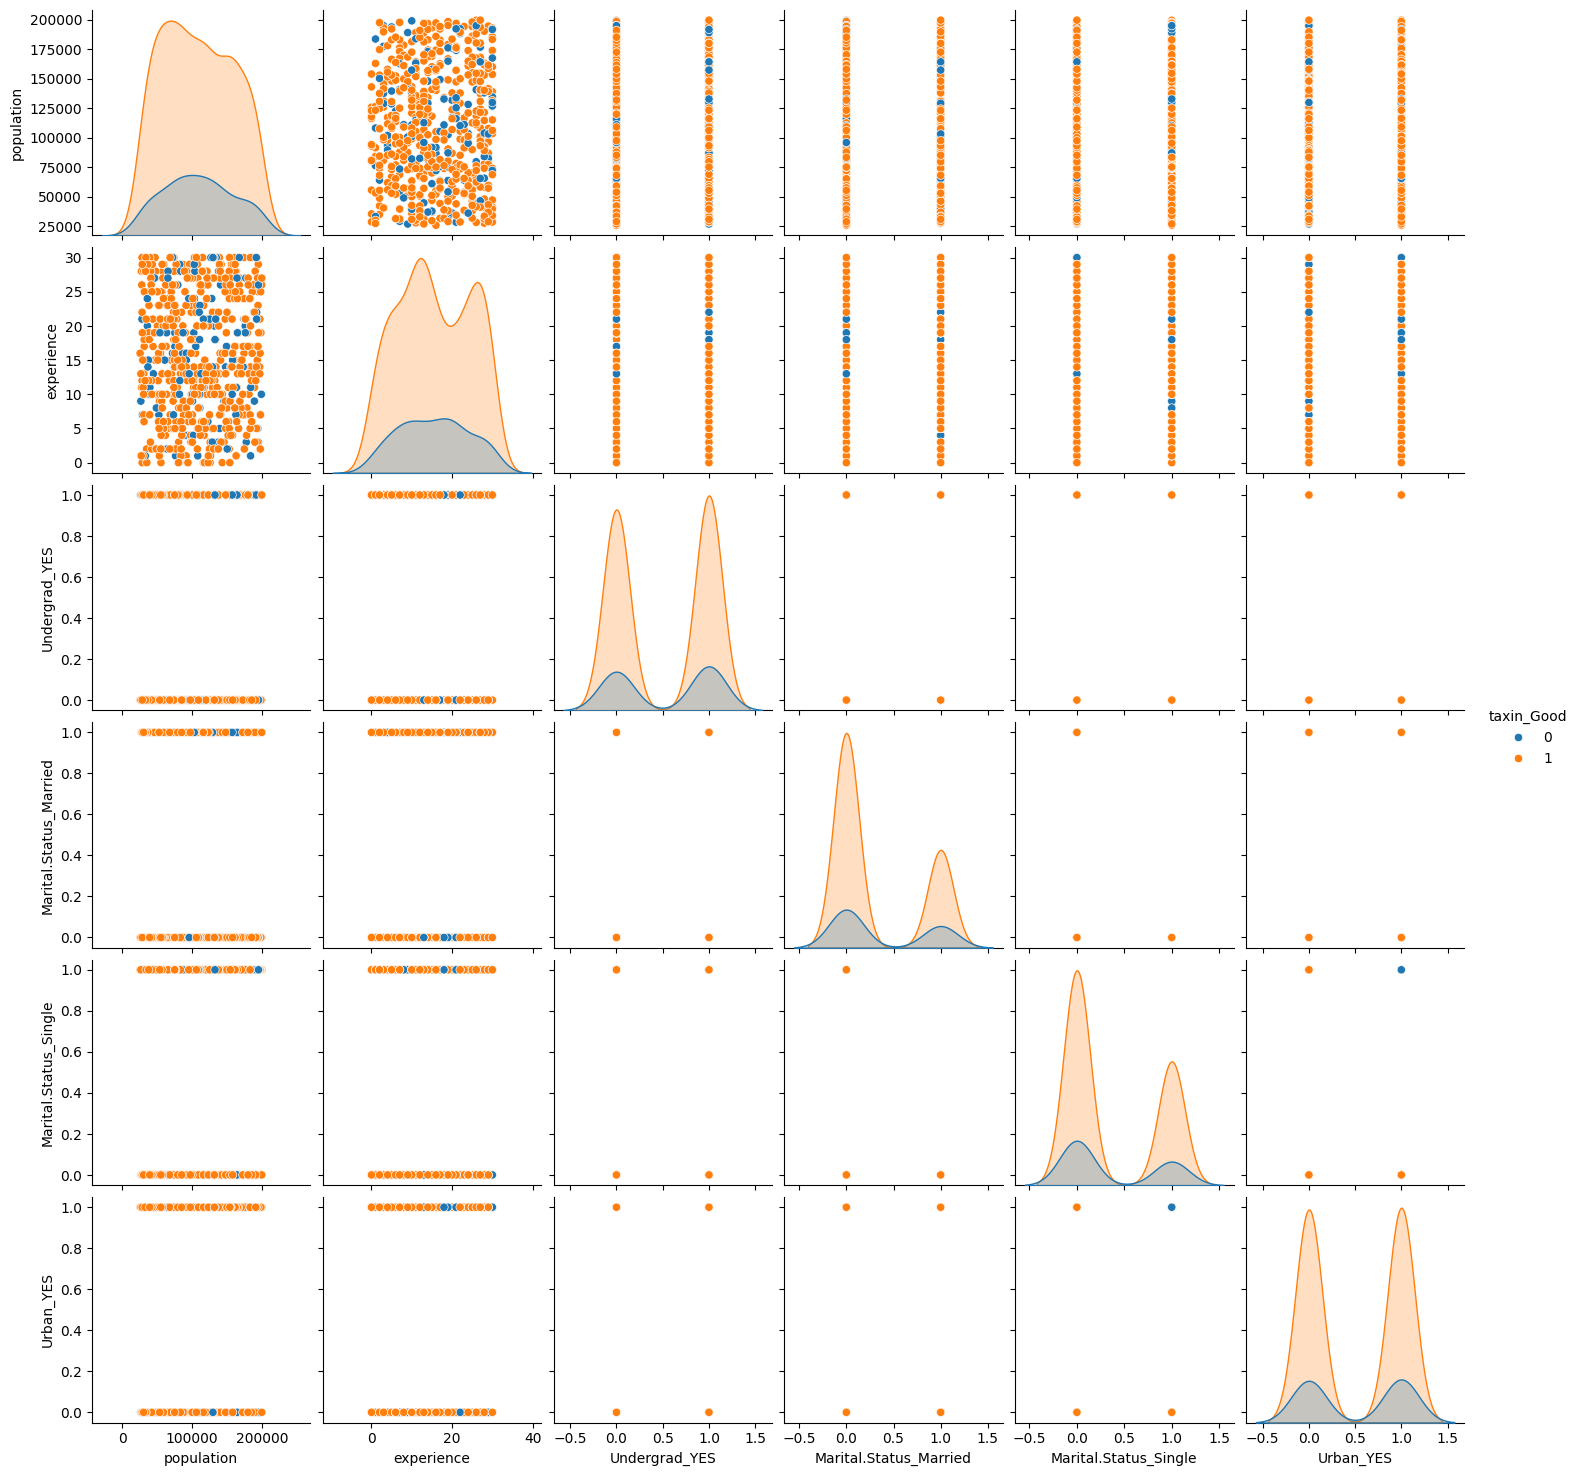

In [ ]:
sns.pairplot(fraud, hue='taxin_Good')

In [ ]:
#Spliting into features and labels
features= fraud.iloc[:,0:6]
labels=fraud.iloc[:,6]

In [ ]:
colnames=list(fraud.columns)
predictors=colnames[0:6]
target=colnames[6]

### Spliting the data in features and labels on trainning and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,stratify=labels)

# Decision Tree Model Building

In [ ]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

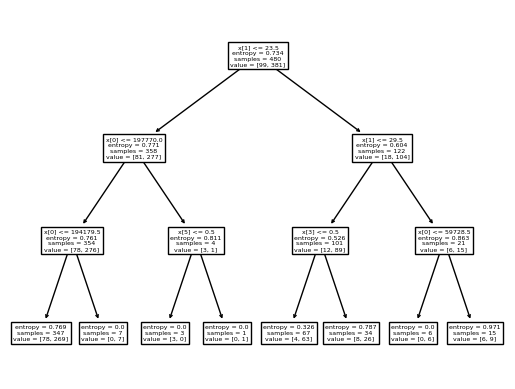

In [ ]:
#Plot the decision tree
tree.plot_tree(model1);

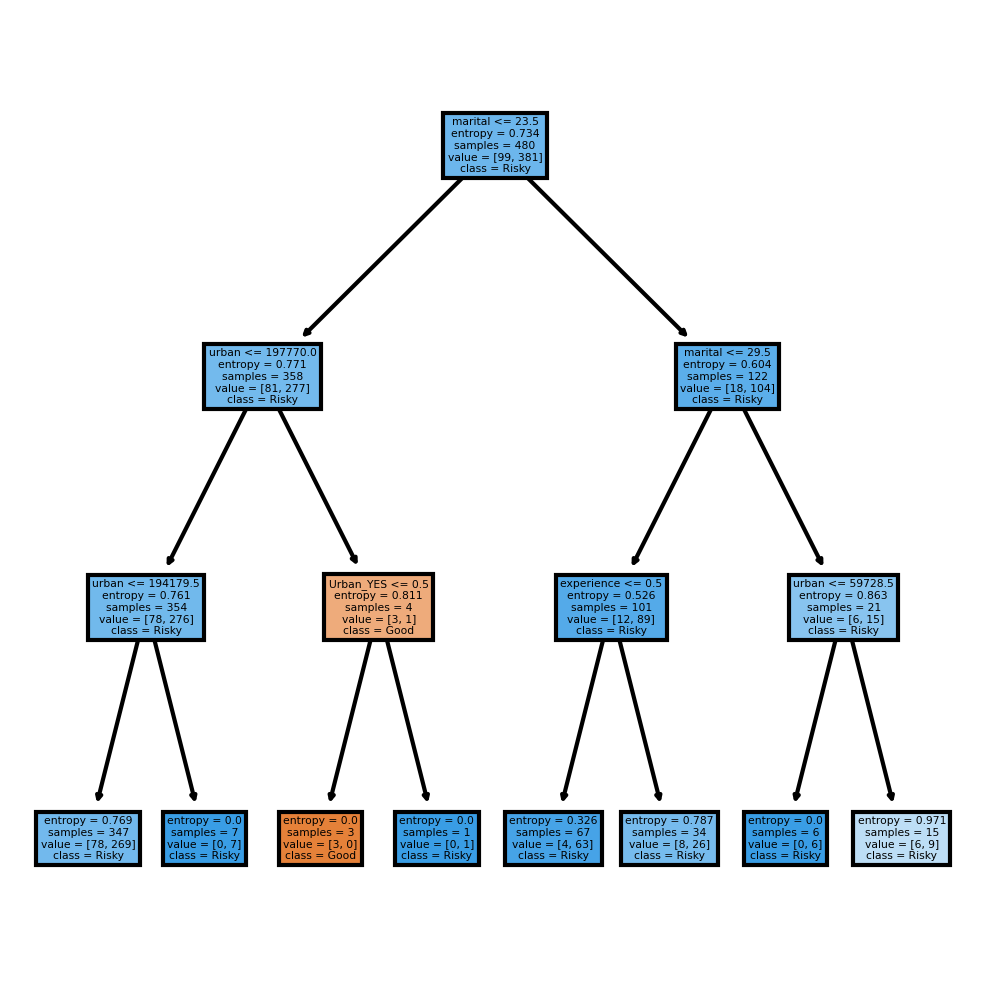

In [ ]:
fn=['urban','marital','population','experience','undergrad','Urban_YES']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#In text tree
text=tree.export_text(model1,max_depth=3)
print(text)

|--- feature_1 <= 23.50
|   |--- feature_0 <= 197770.00
|   |   |--- feature_0 <= 194179.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  194179.50
|   |   |   |--- class: 1
|   |--- feature_0 >  197770.00
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 1
|--- feature_1 >  23.50
|   |--- feature_1 <= 29.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  29.50
|   |   |--- feature_0 <= 59728.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  59728.50
|   |   |   |--- class: 1



In [ ]:
#feature importances
model1.feature_importances_

array([0.4320238 , 0.22353161, 0.        , 0.20008697, 0.        ,
       0.14435763])

In [ ]:
import pandas as pd
feature_imp=pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False)
print(feature_imp)

urban         0.432024
marital       0.223532
experience    0.200087
Urban_YES     0.144358
population    0.000000
undergrad     0.000000
dtype: float64


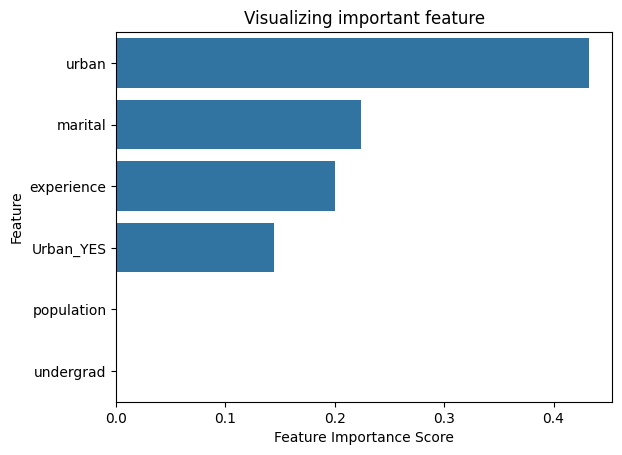

In [ ]:
#Creating a bar plot
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizing important feature')
plt.show()

### Predicting on test data

In [ ]:
pred=model1.predict(x_test)
pd.Series(pred).value_counts()


1    119
0      1
dtype: int64

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
# Accuracy
np.mean(pred==y_test)

0.7833333333333333

### We try to another parameters

In [ ]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=15)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

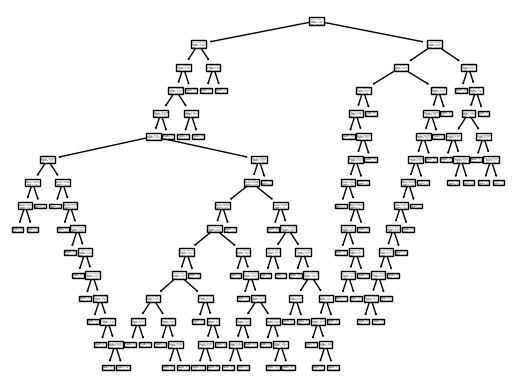

In [ ]:
#Plot the decision tree
tree.plot_tree(model2);

In [ ]:
model2.feature_importances_

array([0.66900355, 0.18891344, 0.02142567, 0.0568724 , 0.00650689,
       0.05727806])

In [ ]:
#Predicting on test data
preds = model2.predict(x_test)
pd.Series(preds).value_counts()

1    106
0     14
dtype: int64

In [ ]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [ ]:
# Accuracy
np.mean(preds==y_test)

0.7083333333333334

# Building  Decision Tree classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
predict=model_gini.predict(x_test)
np.mean(predict==y_test)

0.7583333333333333

In [ ]:
model_gini.score(x_test,y_test)

0.775

In [ ]:
model_gini.feature_importances_

array([0.39356174, 0.46864619, 0.        , 0.13779206, 0.        ,
       0.        ])

# Bagged Decision Trees for Classification

In [ ]:
# Bagged Decision Trees for Classification
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array = fraud.values
X = array[:,0:6]
Y = array[:,6]
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 500
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7350000000000001


## Conclusion

### We use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"